# Wrangle and Analyze- We Rate Dogs

# Introduction

Real-world data rarely comes clean.
Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. 

I will document wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

# Gathering Data

1)Twitter Archive file: Download this file manually or from the resources tab of Udacity's server: twitter_archive_enhanced.csv

2)Tweet Image Prediction:The tweet image predictions,that is what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is available on resource's tab of Udacity's servers and should be downloaded programmatically using the Requests library.

3)Twitter API & JSON: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.m

In [1]:
#Import all the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import time
%matplotlib inline

In [2]:
# load the twitter-archive-enhanced.csv into a DataFrame
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# loading the data of image prediction
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [4]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json(2).txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [6]:
temp = []
import json 

with open('tweet_json(2).txt', encoding='utf-8') as js_file:
    for i in js_file:
        data = json.loads(i)
        tweet_id = data['id']
        tweet = data['full_text']
        url1 = tweet[tweet.find('https'):]
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']  
        retweet_status = data['retweet_status'] = data.get('retweet_status', 'Original tweet')
        if retweet_status == 'Original tweet':
            url = url1
        else:
            retweeted_status = 'A retweet'
            url = 'A retweet'
        
    
        temp.append({'tweet_id': tweet_id,'favorite_count': favorite_count,'retweet_status': retweet_status,
                     'url': url,'retweet_count': retweet_count})

# create a new DataFrame 
df_new = pd.DataFrame(temp, columns = ['tweet_id', 'favorite_count','retweet_count', 'retweet_status', 'url'])
                                          
                                                           
df_new.head()

df_new.to_csv('tweet_json(2).txt', index=False)

In [7]:
#to analyse the tweet_json 
tweet_json = pd.read_csv('tweet_json(2).txt')

# Assessing Data
Each piece of gathered data is displayed in the Jupyter Notebook for assessment purposes.

In [8]:
# to analyse the first 10 rows of twitter-archive-enhanced.csv
df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
#to analyse the first 10 rows of image prediction
image_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
# to analyse first 10 rows of tweet json
tweet_json.head(10)

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,34820,7301,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30158,5456,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,22704,3596,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,38051,7488,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36339,8047,Original tweet,https://t.co/AtUZn91f7f
5,891087950875897856,18328,2696,Original tweet,https://t.co/kQ04fDDRmh
6,890971913173991426,10674,1742,Original tweet,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,890729181411237888,58621,16381,Original tweet,https://t.co/v0nONBcwxq
8,890609185150312448,25253,3745,Original tweet,https://t.co/9TwLuAGH0b
9,890240255349198849,28791,6326,Original tweet,https://t.co/t1bfwz5S2A


In [11]:
# to analyze the number of null value present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# to analyze the number of null value present
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
# to analyze the number of null value present
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   favorite_count  2327 non-null   int64 
 2   retweet_count   2327 non-null   int64 
 3   retweet_status  2327 non-null   object
 4   url             2327 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.0+ KB


In [14]:
#to get the count of null values in twitter archive 
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
#to get the count of null values in image prediction
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [16]:
#to get the count of null values in tweet_json
tweet_json.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
retweet_status    0
url               0
dtype: int64

In [17]:
#to check for duplicates in the data
sum(df.duplicated())

0

In [18]:
#to check for duplicates in the data
sum(image_prediction.duplicated())

0

In [19]:
#to check for duplicates in the data
sum(tweet_json.duplicated())

0

In [20]:
#returns descriptive statistics for each column of data
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
#returns descriptive statistics for each column of data
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
#returns descriptive statistics for each column of data
tweet_json.describe()

,tweet_id,favorite_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.420309e+17,7279.159433,2572.358831
std,6.822565e+16,11295.966791,4348.098885
min,6.660209e+17,0.000000,1.000000
25%,6.783607e+17,1264.000000,522.000000
50%,7.184600e+17,3150.000000,1199.000000
75%,7.986778e+17,8902.500000,2981.000000
max,8.924206e+17,149506.000000,73670.000000


In [23]:
#returns number of unique values in each column
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [24]:
#returns number of unique values in each column
image_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [25]:
#returns number of unique values in each column
tweet_json.nunique()

tweet_id          2327
favorite_count    1977
retweet_count     1661
retweet_status       1
url               2166
dtype: int64

In [26]:
#applying the sort function and finding the unique values
np.sort(df['rating_numerator'].unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776], dtype=int64)

In [27]:
#applying the sort function and finding the unique values
np.sort(df['rating_denominator'].unique())

array([  0,   2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80,  90,
       110, 120, 130, 150, 170], dtype=int64)

In [28]:
#to get a Series containing counts of unique values in rating_numerator
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [29]:
#to get a Series containing counts of unique values in rating_denominator
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

# Quality Issue

# Tidiness Issue¶

-Merge the clean versions of twitter_archive dataframe, image_prediction datframe, and tweet_json dataframes

-Create one column for the various dog types: doggo, floofer, pupper, puppo

# Clean

In [32]:
#Make a copy of tables before cleaning
twitter_archive_clean= df.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

# Cleaning Data

# Tidiness Issue
Merge the twitter_archive dataframe, image_prediction dataframe, and tweet_json dataframes 

# Define
Using python command "CONCAT" we can merge the datasets

# Code

In [33]:
# Ref: https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes/44338256
df_clean = pd.concat([twitter_archive_clean, image_prediction_clean, tweet_json_clean], join='outer', axis=1)

# Test
To check whether all dataset have merged

In [34]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,34820.0,7301.0,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,30158.0,5456.0,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.138584,True,bloodhound,0.116197,True,8.918152e+17,22704.0,3596.0,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,38051.0,7488.0,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.243682,True,Doberman,0.154629,True,8.913276e+17,36339.0,8047.0,Original tweet,https://t.co/AtUZn91f7f


In [35]:
df_clean.shape

(2356, 34)

In [36]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id',
       'favorite_count', 'retweet_count', 'retweet_status', 'url'],
      dtype='object')

# Quality Issue¶
Removing column's with missing values and which are not required.

# Define
Deleting the column's using DROP function, for column Axis = 1

# Code

In [37]:
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 
           'retweeted_status_timestamp'], axis=1, inplace=True)

# Test
To test, we display the dataset using .HEAD() function

In [38]:
df_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,34820.0,7301.0,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,30158.0,5456.0,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,0.138584,True,bloodhound,0.116197,True,8.918152e+17,22704.0,3596.0,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,38051.0,7488.0,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,0.243682,True,Doberman,0.154629,True,8.913276e+17,36339.0,8047.0,Original tweet,https://t.co/AtUZn91f7f


# Tidiness Issue
Create one column for the various dog types : doggo, floofer, pupper, puppo 

# Define
We can extract the data using .EXTRACT() 

# Code

In [39]:
# Extract the text from the columns into the new "dog_type column"
df_clean['dog_type'] = df_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [40]:
df_clean[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,dog_type,doggo,floofer,pupper,puppo
1445,pupper,None,None,pupper,None
867,NaN,None,None,None,None
2295,NaN,None,None,None,None
1286,NaN,None,None,None,None
598,NaN,None,None,None,None


# Test

In [42]:
df_clean.head(3)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,True,Shetland_sheepdog,0.061428,True,8.924206e+17,34820.0,7301.0,Original tweet,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,30158.0,5456.0,Original tweet,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,True,bloodhound,0.116197,True,8.918152e+17,22704.0,3596.0,Original tweet,https://t.co/wUnZnhtVJB,NaN


In [43]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'tweet_id', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'tweet_id', 'favorite_count', 'retweet_count',
       'retweet_status', 'url', 'dog_type'],
      dtype='object')

In [44]:
df_clean.dog_type.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_type, dtype: int64

# Quality Issue
Remove etrxa columns with same data : doggo, floofer, pupper, puppo

# Define
We can delete any column using .DROP() 

# Code

In [45]:
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

# Test
Check whether you can see the changes in the dataset

In [46]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id',
       'favorite_count', 'retweet_count', 'retweet_status', 'url', 'dog_type'],
      dtype='object')

In [47]:
df_clean.head(2)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,tweet_id,...,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,6.660209e+17,...,True,Shetland_sheepdog,0.061428,True,8.924206e+17,34820.0,7301.0,Original tweet,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6.660293e+17,...,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,30158.0,5456.0,Original tweet,https://t.co/0Xxu71qeIV,NaN


# Quality Issue
tweet_id should be a string 

# Define
Converting the dataype using .ASTYPE() method

# Code

In [48]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)

# Test
To check the datatype using type method

In [49]:
df_clean.columns.get_loc("tweet_id")

array([ True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False])

In [50]:
type(df_clean.iloc[0,0])

str

# Quality Issue
img_num should be in string


# Define
Converting the dataype using .ASTYPE() method

# Code

In [51]:
df_clean['img_num'] = df_clean['img_num'].astype(str)

# Test
To check the datatype using type method

In [52]:
df_clean.columns.get_loc("img_num")

11

In [74]:
type(df_clean.iloc[0,11])

str

# Quality Issue
retweet_count shoud be in integer

# Define
Converting the dataype using .ASTYPE() method

# Code

In [58]:
df_clean = df_clean.fillna(0)
df_clean['retweet_count'] = df_clean['retweet_count'].astype(int)

# Test

In [60]:
df_clean.columns.get_loc("retweet_count")

23

In [69]:
type(df_clean.iloc[0,23])

numpy.int32

# Quality Issue
Timestamp should be in datetime format

# Define
The datetime format is 'YYYY-MM-DD hh:mm:ss'

# Code

In [62]:
#Remove the time zone from the timestamp column
df_clean['timestamp'] = df_clean['timestamp'].str.slice(start=0, stop=-6)

In [63]:
# Changing the timestamp column to a datetime object
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

# Test
To check view dataset

In [64]:
df_clean.head(3)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,tweet_id,...,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0.0,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,6.660208880227901e+17,...,True,Shetland_sheepdog,0.061428,True,8.924206435553362e+17,34820.0,7301,Original tweet,https://t.co/MgUWQ76dJU,0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,0.0,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6.660292850026209e+17,...,True,Rhodesian_ridgeback,0.072010,True,8.921774213063434e+17,30158.0,5456,Original tweet,https://t.co/0Xxu71qeIV,0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,0.0,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,6.660334127010324e+17,...,True,bloodhound,0.116197,True,8.918151813780849e+17,22704.0,3596,Original tweet,https://t.co/wUnZnhtVJB,0


# Quality Issue
favorite_count should be integer,not float


# Define
Converting the dataype using .ASTYPE() method

# Code

In [67]:
df_clean = df_clean.fillna(0)
df_clean['favorite_count'] = df_clean['favorite_count'].astype(int)

# Test

In [68]:
df_clean.columns.get_loc("favorite_count")

22

In [70]:
type(df_clean.iloc[0,22])

numpy.int32

# Quality Issue
Source column is having wrong datatype it should be in Category

# Define
To convert the dataype using .ASTYPE() 

# Code

In [71]:
# Changing Data types to the appropriate 
df_clean['source'] = df_clean['source'].astype('category')

# Test
To check the datatype using type method

In [72]:
df_clean.columns.get_loc("source")

2

In [73]:
df_clean.source.dtype

CategoricalDtype(categories=['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                  '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                  '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                  '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
                 ordered=False)

# Quality Issue
Name column contains some invalid names

# Define
To replace incorrect names with None using .REPLACE() function

# Code

In [59]:
df_clean['name'] = df_clean.name.replace(['None', 'a', 'an', 'very','the', 'not', 'quite', 'actually'], 'None' , inplace = True)

C:\Users\Dell\anaconda3\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


# Test
To check whether the changes are done or not

In [60]:
df_clean[df_clean['name']=='very']

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,tweet_id,...,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url,dog_type


# Quality Issue
Delete Retweets

# Define
Using DROP() function delete the column

# Code

In [61]:
df_clean = df_clean.drop(['retweeted_status_id'], axis=1)

# Test
Check whether the following column is deleted or not?

In [62]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'tweet_id', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'tweet_id', 'favorite_count', 'retweet_count',
       'retweet_status', 'url', 'dog_type'],
      dtype='object')

# Quality Issue
Correct naming issues

# Define
Correct name using .replace function

# Code

In [76]:
df_clean.name = df_clean.name.str.replace('^[a-z]+', 'None')

In [77]:
df_clean['name'].value_counts()

None       854
Charlie     12
Oliver      11
Lucy        11
Cooper      11
          ... 
Trigger      1
Obi          1
Tuco         1
Wesley       1
Bloo         1
Name: name, Length: 932, dtype: int64

# Test

In [78]:
df_clean['name'].sample(10)

1082    None
1085    None
1514    None
2350    None
1290    None
2186    None
2202    None
1064     Leo
848     Juno
1712    None
Name: name, dtype: object

In [65]:
#Storing the cleaned data in CSV file
df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8')

# Quality Issue
Standardize dog ratings

# Define
To convert the dataype using .ASTYPE()

# Code

In [82]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)

In [83]:
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

In [84]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   tweet_id             2356 non-null   object        
 1   timestamp            2356 non-null   datetime64[ns]
 2   source               2356 non-null   category      
 3   text                 2356 non-null   object        
 4   retweeted_status_id  2356 non-null   float64       
 5   expanded_urls        2356 non-null   object        
 6   rating_numerator     2356 non-null   float64       
 7   rating_denominator   2356 non-null   float64       
 8   name                 2356 non-null   object        
 9   tweet_id             2356 non-null   object        
 10  jpg_url              2356 non-null   object        
 11  img_num              2356 non-null   object        
 12  p1                   2356 non-null   object        
 13  p1_conf              2356 non-nul

In [86]:
# Create a new column called rating, and calulate the value with new, standardized ratings
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

In [87]:
df_clean.sample(10)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,tweet_id,...,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url,dog_type,rating
1218,714957620017307648,2016-03-29 23:29:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Curtis. He's an Albino Haberdasher. Te...,0.000000e+00,https://twitter.com/dog_rates/status/714957620...,10.0,10.0,Curtis,7.436092060670403e+17,...,Great_Dane,0.003432,True,7.119988098580439e+17,0,123,Original tweet,https://t.co/j6FQGhxYuN,0,1.0
112,870804317367881728,2017-06-03 00:48:22,"<a href=""http://twitter.com/download/iphone"" r...",Real funny guys. Sending in a pic without a do...,0.000000e+00,https://twitter.com/dog_rates/status/870804317...,11.0,10.0,None,6.67911425562669e+17,...,triceratops,0.085317,False,8.703089999625216e+17,20040,3657,Original tweet,https://t.co/MVQCzrF1g9,0,1.1
1282,708738143638450176,2016-03-12 19:35:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. She gets to stay on the Bachelor...,0.000000e+00,https://twitter.com/dog_rates/status/708738143...,11.0,10.0,Coco,7.503834110685348e+17,...,papillon,0.034504,True,7.073771007858852e+17,3115,1025,Original tweet,https://t.co/iKThgKnW1j,0,1.1
1006,747648653817413632,2016-06-28 04:31:44,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Keurig. He apparently headbutts other ...,0.000000e+00,https://vine.co/v/iqIZFtOxEMB,12.0,10.0,Keurig,7.09158332880298e+17,...,Labrador_retriever,0.174218,True,7.454338709678326e+17,6772,2415,Original tweet,https://t.co/oYbVR4nBsR,0,1.2
2298,667070482143944705,2015-11-18 20:02:51,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,0.000000e+00,0,10.0,10.0,None,nan,...,0,0.000000,0,6.664071268567654e+17,98,30,Original tweet,https://t.co/LopTBkKa8h,0,1.0
857,763956972077010945,2016-08-12 04:35:10,"<a href=""http://twitter.com/download/iphone"" r...",@TheEllenShow I'm not sure if you know this bu...,0.000000e+00,0,12.0,10.0,None,6.968779803757691e+17,...,vacuum,0.119218,False,7.606411372710707e+17,4820,1238,Original tweet,https://t.co/8Kmuj6SFbC,doggo,1.2
101,872668790621863937,2017-06-08 04:17:07,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,https://twitter.com/loganamnosis/status/872657...,14.0,10.0,None,6.677934095837716e+17,...,Great_Dane,0.008164,True,8.721227242856489e+17,31189,7117,Original tweet,https://t.co/PKSpmiefwN,0,1.4
2072,671109016219725825,2015-11-29 23:30:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He asked for chocolate cake for ...,0.000000e+00,https://twitter.com/dog_rates/status/671109016...,8.0,10.0,Toby,8.918151813780849e+17,...,kelpie,0.031379,True,6.707173386652262e+17,1098,437,Original tweet,https://t.co/W2MCt9pTed,0,0.8
898,758854675097526272,2016-07-29 02:40:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,0.000000e+00,https://twitter.com/dog_rates/status/758854675...,11.0,10.0,Lilli,6.99779630832685e+17,...,Great_Dane,0.059048,True,7.562885340304753e+17,42551,16960,Original tweet,https://t.co/hfddJ0OiNR,0,1.1
1367,702598099714314240,2016-02-24 20:56:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Sansa. She's gotten too big for her ch...,0.000000e+00,https://twitter.com/dog_rates/status/702598099...,11.0,10.0,Sansa,7.617453520767795e+17,...,lakeside,0.099713,False,7.001437520531825e+17,7190,2570,Original tweet,https://t.co/Fbdr5orUrJ,pupper,1.1


# Visualizating and Analyzing Data:

In [95]:
#Import the cleaned data
df = pd.read_csv('twitter_archive_master.csv')

In [96]:
df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_id.1,...,p2_dog,p3,p3_conf,p3_dog,tweet_id.2,favorite_count,retweet_count,retweet_status,url,dog_type
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,6.660209e+17,...,True,Shetland_sheepdog,0.061428,True,8.924206e+17,34812.0,7302.0,Original tweet,https://t.co/MgUWQ76dJU,NaN
1,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,6.660293e+17,...,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,30159.0,5456.0,Original tweet,https://t.co/0Xxu71qeIV,NaN
2,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,6.660334e+17,...,True,bloodhound,0.116197,True,8.918152e+17,22705.0,3596.0,Original tweet,https://t.co/wUnZnhtVJB,NaN
3,3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,6.660442e+17,...,True,miniature_pinscher,0.222752,True,8.916896e+17,38058.0,7490.0,Original tweet,https://t.co/tD36da7qLQ,NaN
4,4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,6.660492e+17,...,True,Doberman,0.154629,True,8.913276e+17,36339.0,8048.0,Original tweet,https://t.co/AtUZn91f7f,NaN


In [97]:
#drop the unnamed column
df.drop(['Unnamed: 0'] , axis = 1 , inplace = True)
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_id.1,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,tweet_id.2,favorite_count,retweet_count,retweet_status,url,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,True,Shetland_sheepdog,0.061428,True,8.924206e+17,34812.0,7302.0,Original tweet,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,30159.0,5456.0,Original tweet,https://t.co/0Xxu71qeIV,NaN


In [98]:
# stores the number of rows and columns as tuple
df.shape

(2356, 26)

# Insight 1


# Visualizing the retweet counts, and favorite counts comparison over time.

C:\Users\Dell\anaconda3\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


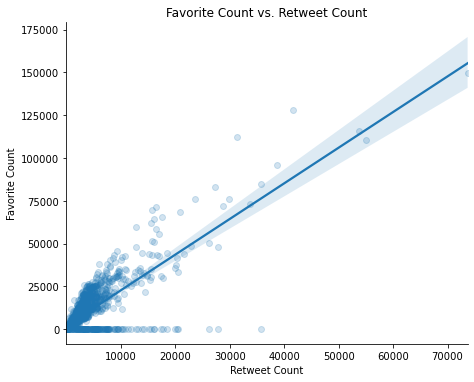

In [99]:
# Scatterplot of retweets vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

# Observation :
This is a positive correlation,since favorite counts are correlated with retweet counts  


# Insight 2


# Visualize the count of image number

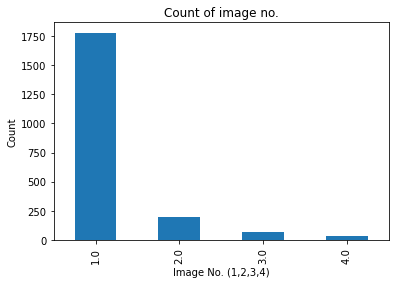

In [100]:
g = df['img_num'].value_counts()
g.plot(kind='bar')
plt.xlabel('Image No. (1,2,3,4)')
plt.ylabel('Count')
plt.title('Count of image no.');

# Observation 
The count of Image number 1 is the highest compared to others


# Insight 3


# Visualize the most common dog type

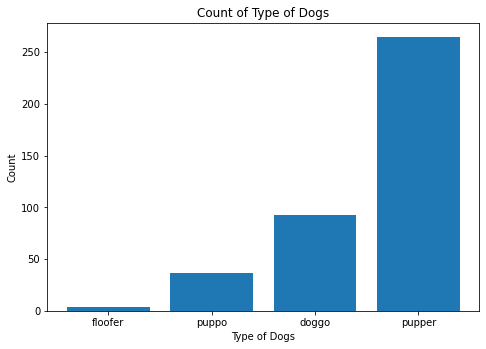

In [101]:
count=list(df['dog_type'].value_counts().sort_values())
label=list(df['dog_type'].value_counts().sort_values().index)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,count)
plt.xlabel("Type of Dogs")
plt.ylabel("Count")
ax.set_title("Count of Type of Dogs")
plt.show()

# Observation :
We can clearly observe that the most famous dog type is " PUPPER" followed by "Doggo" .


References :
https://stackoverflow.com/questions/13021654/get-column-index-from-column-name-in-python-pandas
https://www.w3schools.com/python/python_datetime.asp
https://stackoverflow.com/questions/48140858/json-decoder-jsondecodeerror-extra-data-line-2-column-1-char-190?noredirect=1&lq=1
https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html
https://stackoverflow.com/questions/50491747/extracting-the-meaningful-information-from-the-text-column-using-python
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html